# Learning Goal

1. Calculating the return of a single security
2. Calculating the return of a portfolio of securities ( stock indicies, etc..)
3. Risk, Standard deviation and Variance
4. Relationship between securities (Correlation and Covariance, and calculations )
5. Regressions; how to run regressions, $\alpha$, $\beta$, $R^2$
6. Markowitz's Portfolio Theory: 
    a. CAPM (Capital Asset Pricing Model) : the most widely used asset pricing model 
    b. Calculating Cost of Capital 
    c. Sharp Ratio
7. Monte Carlo Simulation 
    a. Derivatives Pricing 
    b. Stock Pricing 
    c. Corporate Finance

Rate of Return
We can use 2 different methods to calculate rate of return:

Simple rate of return : Preferred for multiple assets over the same timeframe
Logarithmic rate of return : Preferred for a single asset over time

1. Simple rate of return
simpleRateOfReturn = (endpingPrice - beginningPrice) / beginningPrice
2. Logarithmic rate of return
logRateOfReturn = log(endingPrice/begininngPrice) = log endpingPrice - log beginingPrice

Formula for Yearly Return
yearlyReturn = [(dailyReturn+1)^365] * 100 -1  # This formula converts daily, monthly, and quarterly returns to yearly


In [1]:
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
MSFT = web.DataReader('MSFT', data_source='yahoo',start='2020-01-01')

In [3]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998
2020-09-23,208.100006,200.029999,207.899994,200.589996,30803800.0,200.589996
2020-09-24,205.570007,199.199997,199.850006,203.190002,31202500.0,203.190002
2020-09-25,209.039993,202.539993,203.550003,207.820007,29416000.0,207.820007


In [4]:
'''Simple Rate of Return
Reminder: Simple rate of return is preferred for multiple assets over the same timeframe'''
# Daily return
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1

In [5]:
print (MSFT['simple_return'])

Date
2019-12-31         NaN
2020-01-02    0.018516
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
2020-01-09    0.012493
2020-01-10   -0.004627
2020-01-13    0.012024
2020-01-14   -0.007043
2020-01-15    0.006476
2020-01-16    0.018323
2020-01-17    0.005597
2020-01-21   -0.003591
2020-01-22   -0.004805
2020-01-23    0.006156
2020-01-24   -0.010077
2020-01-27   -0.016723
2020-01-28    0.019596
2020-01-29    0.015593
2020-01-30    0.028208
2020-01-31   -0.014759
2020-02-03    0.024379
2020-02-04    0.032917
2020-02-05   -0.001221
2020-02-06    0.020734
2020-02-07    0.001416
2020-02-10    0.026157
2020-02-11   -0.022576
2020-02-12    0.001464
                ...   
2020-08-14    0.000958
2020-08-17    0.006606
2020-08-18    0.005754
2020-08-19   -0.006067
2020-08-20    0.023271
2020-08-21   -0.007270
2020-08-24    0.003145
2020-08-25    0.013009
2020-08-26    0.021620
2020-08-27    0.024554
2020-08-28    0.010283
2020-08-31   -0.014766
2020-0

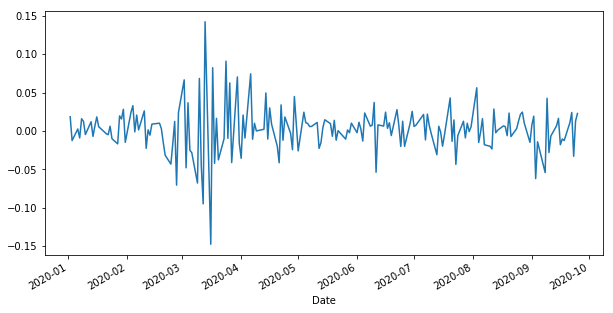

In [6]:
MSFT['simple_return'].plot(figsize=(10,5)) # creates a graph with 8,5
plt.show()

In [7]:
# Calculate average daily return
simple_avg_returns_daily = MSFT['simple_return'].mean()  # pandas.DataFrame.mean()
simple_avg_returns_daily

0.001999177391020991

In [8]:
# Calculate average return per year
simple_avg_returns_annually = MSFT['simple_return'].mean()*250  # 250 Number of trading days in a year  
simple_avg_returns_annually

0.4997943477552478

In [9]:
print(str(round(simple_avg_returns_annually,5) * 100) + '%')

49.979%


In [10]:
'''Log Returns
Reminder: Preferred for a single asset over time'''
# Numpy offers the posibility of vectorized (array programming) computation 
# Recommended instead of using loops for multi dimensional arrays computations
import numpy as np

In [11]:
MSFT['log_return'] = np.log (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print(MSFT['log_return'])

Date
2019-12-31         NaN
2020-01-02    0.018347
2020-01-03   -0.012530
2020-01-06    0.002581
2020-01-07   -0.009160
2020-01-08    0.015803
2020-01-09    0.012416
2020-01-10   -0.004638
2020-01-13    0.011953
2020-01-14   -0.007068
2020-01-15    0.006455
2020-01-16    0.018157
2020-01-17    0.005581
2020-01-21   -0.003597
2020-01-22   -0.004816
2020-01-23    0.006137
2020-01-24   -0.010128
2020-01-27   -0.016865
2020-01-28    0.019406
2020-01-29    0.015472
2020-01-30    0.027817
2020-01-31   -0.014869
2020-02-03    0.024086
2020-02-04    0.032386
2020-02-05   -0.001222
2020-02-06    0.020522
2020-02-07    0.001415
2020-02-10    0.025821
2020-02-11   -0.022834
2020-02-12    0.001463
                ...   
2020-08-14    0.000958
2020-08-17    0.006584
2020-08-18    0.005738
2020-08-19   -0.006085
2020-08-20    0.023005
2020-08-21   -0.007297
2020-08-24    0.003140
2020-08-25    0.012926
2020-08-26    0.021389
2020-08-27    0.024257
2020-08-28    0.010231
2020-08-31   -0.014876
2020-0

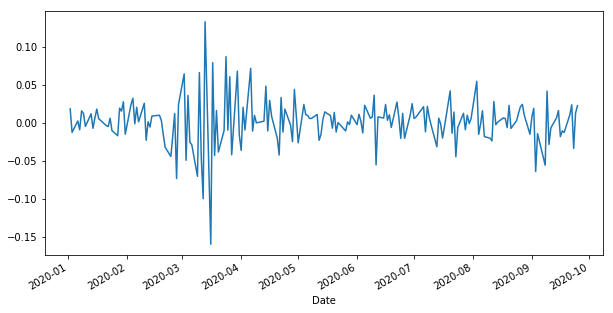

In [12]:
MSFT['log_return'].plot(figsize=(10,5))
plt.show()

In [13]:
log_avg_return_daily = MSFT['log_return'].mean()
log_avg_return_daily

0.0015263504541891523

In [14]:
log_avg_return_annually = MSFT['log_return'].mean() * 250
log_avg_return_annually

0.3815876135472881

In [15]:
print(str(round(log_avg_return_annually,5) * 100) + '%')

38.159%


In [16]:
#Rate of Return for Portfolio of Securities
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [17]:
tickers = ['PG', 'MSFT', 'IBM' ]
myData = pd.DataFrame()
for t in tickers:
    myData[t] = wb.DataReader(t, data_source='yahoo', start='2000-01-01', end='2019-12-31')['Adj Close']

In [18]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 1999-12-31 to 2019-12-31
Data columns (total 3 columns):
PG      5032 non-null float64
MSFT    5032 non-null float64
IBM     5032 non-null float64
dtypes: float64(3)
memory usage: 157.2 KB


In [19]:
print(myData.head())
print(myData.tail())

                   PG       MSFT        IBM
Date                                       
1999-12-31  28.838366  37.259617  68.497292
2000-01-03  28.213228  37.199776  73.656433
2000-01-04  27.670355  35.943153  71.156227
2000-01-05  27.143930  36.322121  73.656433
2000-01-06  28.394205  35.105415  72.386459
                    PG        MSFT         IBM
Date                                          
2019-12-24  122.880356  156.137955  130.113617
2019-12-26  122.880356  157.417786  130.046158
2019-12-27  123.734093  157.705505  130.393173
2019-12-30  122.144363  156.346298  128.021866
2019-12-31  122.566338  156.455429  129.207504


In [20]:
#Normalization to 100
myData.iloc[0] # get first Row. Column names becomes Key.

PG      28.838366
MSFT    37.259617
IBM     68.497292
Name: 1999-12-31 00:00:00, dtype: float64

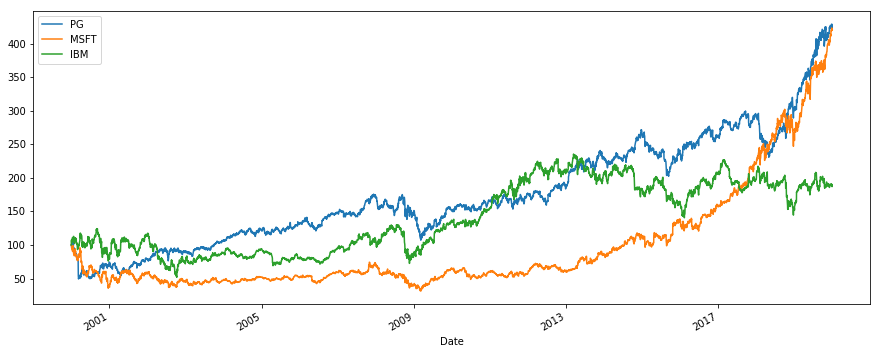

In [21]:
# applying the normalization formula
Pt = myData
P0 = myData.iloc[0]

( Pt / P0 * 100).plot(figsize=(15,6)) # * 100; basically all the stocks are starting from 100 
plt.show()

In [22]:
myData.loc['2000-01-03 00:00:00']  #We can use label

PG      28.213228
MSFT    37.199776
IBM     73.656433
Name: 2000-01-03 00:00:00, dtype: float64

In [23]:
myData.iloc[0] # we can use index instead of label

PG      28.838366
MSFT    37.259617
IBM     68.497292
Name: 1999-12-31 00:00:00, dtype: float64

In [24]:
#A Portfolio of Securities Return Calculation
# Reminder: Simple Return calculation is recommended for 
# multiple securites over the same time period
portReturns = (myData / myData.shift(1)) - 1 
print(portReturns.head())

portWeights = np.array([0.25, 0.50, 0.25]) # Create a numpy array
# calculate vetor or matrix
np.dot(portReturns, portWeights)

                  PG      MSFT       IBM
Date                                    
1999-12-31       NaN       NaN       NaN
2000-01-03 -0.021677 -0.001606  0.075319
2000-01-04 -0.019242 -0.033780 -0.033944
2000-01-05 -0.019025  0.010544  0.035137
2000-01-06  0.046061 -0.033498 -0.017242


array([        nan,  0.01260738, -0.03018668, ...,  0.0033179 ,
       -0.01206776,  0.00352799])

In [25]:
returnsAnnual = portReturns.mean() * 250 # number of trading days in a year
print(returnsAnnual)

np.dot(returnsAnnual, portWeights)

PG      0.094001
MSFT    0.116319
IBM     0.064115
dtype: float64


0.0976884527811255

In [26]:
portfolio1 = str(round(np.dot(returnsAnnual, portWeights), 5) * 100) + '%'
print(portfolio1)

9.769%


In [27]:
#Comparing with Second Portfolio
# weights are different for the same list of securities
portWeights2 = np.array([0.1, 0.7, 0.2 ])
portfolio2 = str(round(np.dot(returnsAnnual, portWeights2),5) *100) + '%'

In [28]:
print(portfolio1)
print(portfolio2)

9.769%
10.365%


# Market Index
A market index is a hypothetical portfolio of investment holdings that represents a segment of the financial market. 
The calculation of the index value comes from the prices of the underlying holdings. Some indexes have values based 
on market-cap weighting, revenue-weighting, float-weighting, and fundamental-weighting. Weighting is a method of 
adjusting the individual impact of items in an index (Ref: https://www.investopedia.com/terms/m/marketindex.asp)

Why to use Stock Indices:

We can use stock indices to compare your own stocks' returns
Indicates what to expect if you invest in a diversified portfolio
Top Market Indices in the World:

Standard & Poors (US)

500 largest listed companies
Diverse list gives thue representation of the market
Market-Cap Weighted
DowJones (US)

30 large public stocks
one of the oldest indices calculated historically
'cause it only covers 30 stocks, it can't be used to evaluate US stock market
NASDAQ (US)

Grouped securites
Mostly IT companies
NASDAQ shows rate of returns for the tech stocks
FTSE (UK)

DAX30 (Germany)

NIKKEI (Japan)

MSCI (Morgan Stanley Capital International) (Global)

Stocks from all developed markets

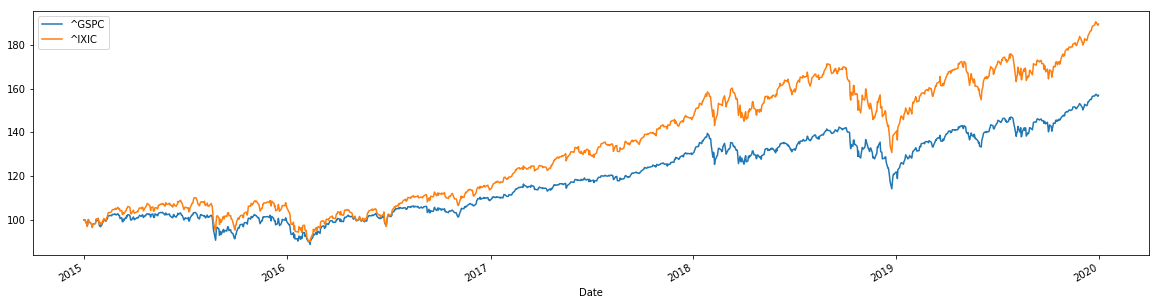

In [30]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

startDate = '2015-01-01'
endDate = '2019-12-31'

tickers = ['^GSPC', '^IXIC' ] # S&P500 abd NASDAQ
indices = pd.DataFrame()
for t in tickers:
    indices[t] = wb.DataReader(t, data_source='yahoo', start=startDate, end=endDate)['Adj Close']
    
indices.head()
(indices / indices.iloc[0] * 100).plot(figsize=(20,5));
plt.show()

In [31]:
indicesReturns = (indices / indices.shift(1)) - 1 
indicesReturns.tail()

,^GSPC,^IXIC
Date,,
2019-12-24,-0.000195,0.000808
2019-12-26,0.005128,0.007764
2019-12-27,0.000034,-0.001748
2019-12-30,-0.005781,-0.006732
2019-12-31,0.002946,0.002974


In [32]:
indicesAnnualReturns = indicesReturns.mean() * 250 # Number of trading days in a year
indicesAnnualReturns

^GSPC    0.098519
^IXIC    0.140039
dtype: float64

In [33]:
# Now we compare stocks with indices
tickers = ['MSFT', '^GSPC', '^IXIC']
data2 = pd.DataFrame()
for t in tickers:
    data2[t] = wb.DataReader(t, data_source='yahoo', start=startDate, end=endDate)['Adj Close']

In [34]:
data2.tail()

,MSFT,^GSPC,^IXIC
Date,,,
2019-12-24,156.137955,3223.379883,8952.879883
2019-12-26,157.417786,3239.909912,9022.389648
2019-12-27,157.705505,3240.020020,9006.620117
2019-12-30,156.346298,3221.290039,8945.990234
2019-12-31,156.455429,3230.780029,8972.599609


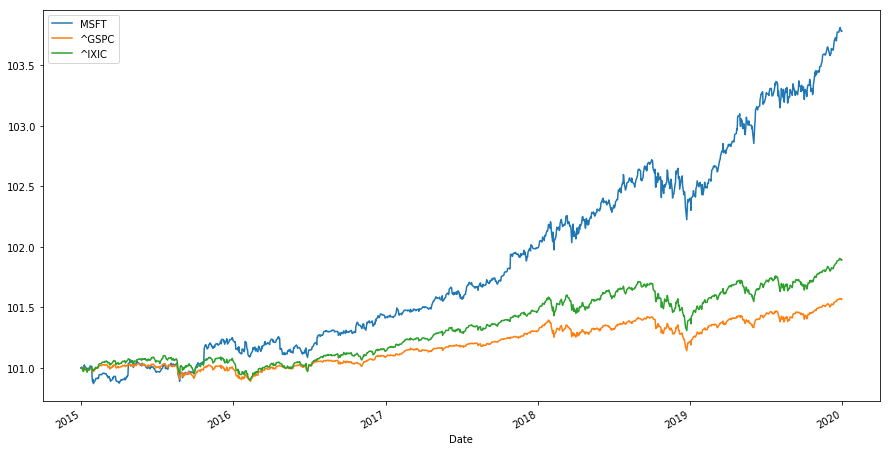

In [35]:
(data2 / data2.iloc[0] + 100).plot(figsize=(15,8));